## 01. Importing Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import folium
import json
import os

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

## 02. Importing Data

In [3]:
df = pd.read_csv('/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis/02 Data/Prepared Data/boat_data_edited.csv', encoding='latin1', index_col=False)

In [4]:
path = r'/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis'

In [5]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis/02 Data/Original Data/custom.geo.json'

In [6]:
import json

with open('/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis/02 Data/Original Data/custom.geo.json', 'r') as f:
    data = json.load(f)

for i in data['features']:
    print(i['properties']['name'])



Nicaragua
Costa Rica
Dominican Rep.
El Salvador
Cuba
Haiti
Guatemala
Honduras
United States of America
Canada
Belize
Mexico
Greenland
Panama
Bahamas
Trinidad and Tobago
Puerto Rico
Chile
Jamaica
Suriname
Peru
Bolivia
Argentina
Colombia
Ecuador
Venezuela
Uruguay
Guyana
Falkland Is.
Brazil
Paraguay
Indonesia
Malaysia
Cyprus
India
China
Israel
Palestine
Lebanon
North Korea
South Korea
Mongolia
Uzbekistan
Tajikistan
Oman
Bhutan
Kazakhstan
Syria
Vietnam
Cambodia
United Arab Emirates
Georgia
Azerbaijan
Laos
Iraq
Armenia
Turkey
Kyrgyzstan
Iran
Qatar
Saudi Arabia
Pakistan
Thailand
Kuwait
Timor-Leste
Brunei
Myanmar
Yemen
Afghanistan
Turkmenistan
Nepal
Bangladesh
Jordan
N. Cyprus
Philippines
Sri Lanka
Taiwan
Japan
Kenya
Malawi
Somalia
S. Sudan
Ethiopia
Tanzania
Morocco
Somaliland
W. Sahara
Congo
Dem. Rep. Congo
Tunisia
Namibia
South Africa
Libya
Zambia
Sierra Leone
Guinea
Liberia
Central African Rep.
Côte d'Ivoire
Djibouti
Eritrea
Sudan
Benin
Nigeria
Senegal
Mali
Botswana
Zimbabwe
Angola
Mozambi

In [7]:
df.head()

Price            Boat Type          Manufacturer                 Type  \
0   CHF 3337          Motor Yacht  Rigiflex power boats  new boat from stock   
1   EUR 3490  Center console boat     Terhi power boats  new boat from stock   
2   CHF 3770           Sport Boat    Marine power boats  new boat from stock   
3  DKK 25900           Sport Boat    Pioner power boats  new boat from stock   
4   EUR 3399         Fishing Boat    Linder power boats  new boat from stock   

   Year Built  Length  Width       Material      Location  \
0        2017    4.00   1.90            NaN  Switzerland    
1        2020    4.00   1.50  Thermoplastic      Germany    
2           0    3.69   1.42      Aluminium  Switzerland    
3        2020    3.00   1.00            NaN      Denmark    
4        2019    3.55   1.46      Aluminium      Germany    

   Number of views last 7 days  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0                          226          NaN          NaN          NaN   
1                           75          NaN          NaN          NaN   
2                          124          NaN          NaN          NaN   
3                           64          NaN          NaN          NaN   
4                           58          NaN          NaN          NaN   

   Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16 Unnamed: 17  
0          NaN          NaN          NaN          NaN         NaN  
1          NaN          NaN          NaN          NaN         NaN  
2          NaN          NaN          NaN          NaN         NaN  
3          NaN          NaN          NaN          NaN         NaN  
4          NaN          NaN          NaN          NaN         NaN

In [8]:
df.shape

(9888, 18)

## 03. Data Wrangling

### Fix Dummy Columns

In [9]:
# Select only the necessary columns and put them in a list called columns
columns = ["Location","Price", "Boat Type","Manufacturer","Type","Year Built","Length","Width","Material","Number of views last 7 days"]

In [10]:
# Create a subset

world_rec = df[columns]

In [11]:
world_rec.head()

Location      Price            Boat Type          Manufacturer  \
0  Switzerland    CHF 3337          Motor Yacht  Rigiflex power boats   
1      Germany    EUR 3490  Center console boat     Terhi power boats   
2  Switzerland    CHF 3770           Sport Boat    Marine power boats   
3      Denmark   DKK 25900           Sport Boat    Pioner power boats   
4      Germany    EUR 3399         Fishing Boat    Linder power boats   

                  Type  Year Built  Length  Width       Material  \
0  new boat from stock        2017    4.00   1.90            NaN   
1  new boat from stock        2020    4.00   1.50  Thermoplastic   
2  new boat from stock           0    3.69   1.42      Aluminium   
3  new boat from stock        2020    3.00   1.00            NaN   
4  new boat from stock        2019    3.55   1.46      Aluminium   

   Number of views last 7 days  
0                          226  
1                           75  
2                          124  
3                           64  
4                           58

## 03. Conduct Consistency Checks

In [12]:
# Check for missing values

world_rec.isnull().sum()

Location                         36
Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
dtype: int64

In [13]:
# Impute missing values with mode since they are categorical values

world_rec['Manufacturer'].fillna(world_rec['Manufacturer'].mode()[0], inplace=True)
world_rec['Width'].fillna(world_rec['Width'].mode()[0], inplace=True)
world_rec['Material'].fillna(world_rec['Material'].mode()[0], inplace=True)
world_rec['Location'].fillna(world_rec['Location'].mode()[0], inplace=True)
world_rec['Type'].fillna(world_rec['Type'].mode()[0], inplace=True)
world_rec['Length'].fillna(world_rec['Length'].mode()[0], inplace=True)

/var/folders/kg/70nhdryn2cb2xg36fgtmq9hh0000gn/T/ipykernel_20210/2737867157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_rec['Manufacturer'].fillna(world_rec['Manufacturer'].mode()[0], inplace=True)
/var/folders/kg/70nhdryn2cb2xg36fgtmq9hh0000gn/T/ipykernel_20210/2737867157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_rec['Width'].fillna(world_rec['Width'].mode()[0], inplace=True)
/var/folders/kg/70nhdryn2cb2xg36fgtmq9hh0000gn/T/ipykernel_20210/2737867157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [14]:
# Last check for NaN

world_rec.isnull().sum()

Location                       0
Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
dtype: int64

In [15]:
dups = world_rec.duplicated()

In [16]:
dups.shape # no dups

(9888,)

### Extreme Values Check

<AxesSubplot:xlabel='Length', ylabel='Count'>

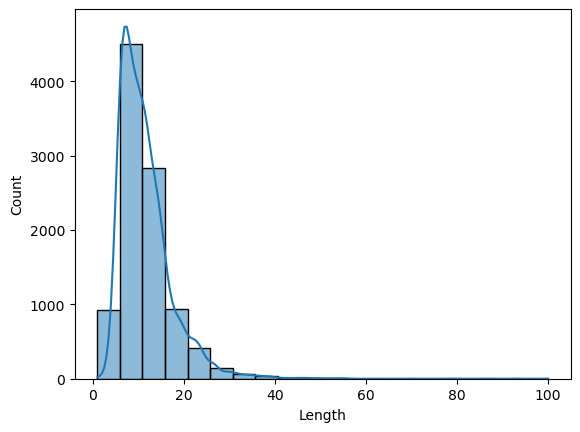

In [17]:
sns.histplot(world_rec['Length'], bins=20, kde = True) # shows extreme values for 'length'

In [18]:
# Check how many extreme values

world_rec[world_rec['Length'] >40]

Location         Price       Boat Type  \
2461           Netherlands     EUR 237500      House Boat   
2632           Netherlands     EUR 290000  Passenger boat   
2926               Belgium     EUR 490000      Mega Yacht   
3014           Netherlands     EUR 625000  Passenger boat   
3259               Germany    EUR 2100000  Passenger boat   
3280                 Italy    EUR 3600000     Motor Yacht   
3308                 Italy    EUR 4995000      Mega Yacht   
3311  United Arab Emirates   EUR 16025000      Mega Yacht   
3312                 Greece  EUR 14950000      Mega Yacht   
3313               Germany   EUR 14850000      Mega Yacht   
3320                France   ÃÂ£ 9995000      Mega Yacht   
3323                 Italy    EUR 9900000      Mega Yacht   
3325  United Arab Emirates   EUR 31000000      Mega Yacht   
3326  United Arab Emirates   EUR 24050000      Mega Yacht   
3327                Greece   EUR 23500000      Mega Yacht   
3328                Germany  EUR 19900000      Mega Yacht   
3332            Netherlands   EUR 9250000      Mega Yacht   
3336                Turkey    EUR 8950000      Mega Yacht   
3338  United Arab Emirates    EUR 8800000      Mega Yacht   
3349                 Italy    EUR 6950000      Mega Yacht   
3359                 Spain    EUR 6000000         Trawler   
3362                France    EUR 5900000      Mega Yacht   
3371                 Italy    EUR 4600000      Mega Yacht   
3412                France    EUR 2900000     Motor Yacht   
3472               Belgium    EUR 1950000      Mega Yacht   
3913           Netherlands     EUR 640000  Passenger boat   
3934           Netherlands     EUR 600000  Passenger boat   
3942           Netherlands     EUR 599000  Passenger boat   
4325                 Malta     EUR 395000       Flybridge   
4842               Belgium     EUR 265000      House Boat   
7520               Belgium      EUR 60000    Working Boat   
8651           Netherlands      EUR 34500         Trawler   
9561           Netherlands      EUR 14500      Mega Yacht   

                                  Manufacturer                        Type  \
2461                BÃÂ©nÃÂ©teau power boats            Used boat,Diesel   
2632                BÃÂ©nÃÂ©teau power boats                   Used boat   
2926                BÃÂ©nÃÂ©teau power boats                   Used boat   
3014                BÃÂ©nÃÂ©teau power boats            Used boat,Diesel   
3259                BÃÂ©nÃÂ©teau power boats            Used boat,Diesel   
3280               Richard Dunston power boats            Used boat,Diesel   
3308                       Benetti power boats            Used boat,Diesel   
3311                Majesty Yachts power boats  new boat from stock,Diesel   
3312                BÃÂ©nÃÂ©teau power boats            Used boat,Diesel   
3313                BÃÂ©nÃÂ©teau power boats                      Diesel   
3320                     Sunseeker power boats            Used boat,Diesel   
3323                     Baglietto power boats            Used boat,Diesel   
3325                Majesty Yachts power boats  new boat from stock,Diesel   
3326                Majesty Yachts power boats  new boat from stock,Diesel   
3327                       Benetti power boats            Used boat,Diesel   
3328                Bandido Yachts power boats  new boat from stock,Diesel   
3332                     Sunseeker power boats                   Used boat   
3336                BÃÂ©nÃÂ©teau power boats            Used boat,Diesel   
3338                Majesty Yachts power boats            Used boat,Diesel   
3349                BÃÂ©nÃÂ©teau power boats            Used boat,Diesel   
3359           Abeking & Rasmussen power boats                   Used boat   
3362  Rodriguez Group (Italyachts) power boats            Used boat,Diesel   
3371               Perini Navi Spa power boats            Used boat,Diesel   
3412                BÃÂ©nÃÂ©teau power boats                   Used bo

In [19]:
# Clean extreme values

world_rec = world_rec[world_rec['Length'] < 40]

# 40 was picked because it is seems very rare to buy a yacht over 40 meters

In [20]:
world_rec.shape

(9853, 10)

In [21]:
sns.histplot(world_rec['Width'], bins=20, kde = True) # shows extreme values for 'Width'

<AxesSubplot:xlabel='Width', ylabel='Count'>

In [22]:
# Check how many extreme values

world_rec[world_rec['Width'] >10]

Location        Price       Boat Type                Manufacturer  \
3223  Netherlands   EUR 1590000  Passenger boat  BÃÂ©nÃÂ©teau power boats   
3409         Spain  EUR 2950000     Motor Yacht         Sunreef power boats   
3411        Italy   EUR 2900000       Catamaran    Magic Yachts power boats   
3417        Spain   EUR 2850000       Catamaran         Sunreef power boats   
3428  Netherlands   EUR 2490000  Passenger boat  BÃÂ©nÃÂ©teau power boats   
4251       Norway    EUR 420000      House Boat  BÃÂ©nÃÂ©teau power boats   

                            Type  Year Built  Length  Width Material  \
3223            Used boat,Diesel        1971    1.04  11.61    Steel   
3409            Used boat,Diesel        2017   20.45  10.50      GRP   
3411  new boat from stock,Diesel        2014   27.00  25.16      GRP   
3417            Used boat,Diesel        2017   20.45  10.50      GRP   
3428            Used boat,Diesel        1990    1.05  10.15    Steel   
4251                   Used boat        2015   15.00  15.00      GRP   

      Number of views last 7 days  
3223                           78  
3409                          164  
3411                          137  
3417                          178  
3428                          131  
4251                          117

In [23]:
# Clean extreme values

world_rec = world_rec[world_rec['Width'] < 10]

# 10 was picked because it seems uncommon to purchase a yacht over 10 meters wide

In [24]:
world_rec.shape

(9847, 10)

In [28]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = world_rec[['Location','Number of views last 7 days']]
data_to_plot.head()

Location  Number of views last 7 days
0  Switzerland                           226
1      Germany                            75
2  Switzerland                           124
3      Denmark                            64
4      Germany                            58

In [26]:
# Replace NaN values with 0
data_to_plot = data_to_plot.fillna(0)

In [29]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Location', 'Number of views last 7 days'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [29]:
path = '/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis/Data/Original Data/custom.geo.json'
absolute_path = os.path.abspath(path)
print(absolute_path)

/Users/malikpressley/Desktop/Achievement 6/Boat Sales Analysis/Data/Original Data/custom.geo.json


In [30]:
#Discuss the results and what they mean in a markdown section.
#Does the analysis answer any of your existing research questions?

## The results are are showing views comng from Europe, parts of the Middle East and even South America and South Asia. 

In [31]:
#Does the analysis lead you to any new research questions?

## I believe further analysis will need to be conducted to answer my question. Perhaps, different processes in python, even SQL